# Cleaning the Data

## Data Import

In [93]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.express as px

Importing raw data from courseInfo.JSON. In order to analyze the data, we must import it into our code. The data is scraped from various courses in Coursera.

In [74]:
raw_coursera = pd.read_json('courseInfo.JSON')
raw_coursera.head()


,link,title,ratingPercentage,ratingCount,enrolledCount,recentViews,instructorRatingCount,instructorRating,reviewCount,reviewRating,...,contentRatingCount,syllabus,partners,whatYouWillLearn,skills,productGlance,instructors,reviewStarPercentage,enrollInformation,learnerCareerOutcomes
0,https://www.coursera.org/learn/machine-learning?,Supervised Machine Learning: Regression and Cl...,98%,"11,187 ratings","365,621","2,816,756 recent views","(4,494 Ratings)",4.95/5,2507 reviews,4.9,...,"(111,946 ratings)","[[7 hours to complete, Week 1: Introduction to...","[[DeepLearning.AI, DeepLearning.AI is an educa...",[Build machine learning models in Python using...,"[Regularization to Avoid Overfitting, Gradient...","[[Flexible deadlines, Reset deadlines in accor...","[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 91.73%], [4 stars, 7.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN
1,https://www.coursera.org/learn/advanced-learni...,Advanced Learning Algorithms,98%,"2,813 ratings","129,874","1,274,781 recent views",(981 Ratings),4.97/5,487 reviews,4.9,...,"(27,868 ratings)","[[7 hours to complete, Neural Networks, This w...","[[DeepLearning.AI, DeepLearning.AI is an educa...",[Build and train a neural network with TensorF...,"[Artificial Neural Network, Xgboost, Tensorflo...","[[Flexible deadlines, Reset deadlines in accor...","[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 93.04%], [4 stars, 6.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN
2,https://www.coursera.org/learn/unsupervised-le...,"Unsupervised Learning, Recommenders, Reinforce...",97%,"1,379 ratings","97,661","620,545 recent views",(477 Ratings),4.96/5,279 reviews,4.9,...,"(12,426 ratings)","[[9 hours to complete, Unsupervised learning, ...","[[DeepLearning.AI, DeepLearning.AI is an educa...",[Use unsupervised learning techniques for unsu...,"[Collaborative Filtering, Unsupervised Learnin...","[[Flexible deadlines, Reset deadlines in accor...","[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 92.21%], [4 stars, 6.78%], [3 stars...","[Financial aid available, This Course Plus the...",NaN
3,https://www.coursera.org/learn/ml-foundations?...,Machine Learning Foundations: A Case Study App...,93%,"13,277 ratings","375,689","85,579 recent views","(1,161 Ratings)",4.68/5,3183 reviews,4.6,...,"(55,420 ratings)",[],"[[University of Washington, Founded in 1861, t...",[],"[Python Programming, Machine Learning Concepts...","[[Flexible deadlines, Reset deadlines in accor...","[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 72.43%], [4 stars, 20.94%], [3 star...","[Financial aid available, This Course Plus the...",NaN
4,https://www.coursera.org/learn/ml-regression?s...,Machine Learning: Regression,94%,"5,518 ratings","153,704","32,744 recent views",(163 Ratings),4.78/5,1022 reviews,4.8,...,"(20,688 ratings)",[],"[[University of Washington, Founded in 1861, t...",[],"[Linear Regression, Ridge Regression, Lasso (S...","[[Flexible deadlines, Reset deadlines in accor...","[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 80.92%], [4 stars, 15.92%], [3 star...","[Financial aid available, This Course Plus the...",NaN


The data has 22 different values. Each value has been scraped from the course website on coursera. Values that contain the brackets are arrays. This is because certain groups (e.g professors) contain multiple characteristics (e.g TOP INSTRUCTOR, Company), and thus must be grouped together via multidimensional array. Single Dimmensional Arrays are used for certain texts that contain lists.

## Manipulating Dataset

We must now clean the data in order for it to be looked it. First, we will break down Review Star Percentage Array into Separate Columns in order to individually study each value.

In [75]:
myDict = {
    'reviewStarPercentage': raw_coursera['reviewStarPercentage'],
    'syllabus': raw_coursera['syllabus'],
}
fiveStarList = []
fourStarList = []
threeStarList = []
twoStarList = []
oneStarList = []

for i in myDict['reviewStarPercentage']:
    try:
        fiveStarList.append(i[0][1]) 
    except:
        fiveStarList.append(0)
    try:
        fourStarList.append(i[1][1])
    except:
        fourStarList.append(0)
    try:
        threeStarList.append(i[2][1])
    except:
        threeStarList.append(0)
    try:
        twoStarList.append(i[3][1])
    except:
        twoStarList.append(0)
    try:
        oneStarList.append(i[4][1])
    except:
        oneStarList.append(0)
        
raw_coursera['fiveStarReviewPercentage'] = fiveStarList
raw_coursera['fourStarReviewPercentage'] = fourStarList
raw_coursera['threeStarReviewPercentage'] = threeStarList
raw_coursera['twoStarReviewPercentage'] = twoStarList
raw_coursera['oneStarReviewPercentage'] = oneStarList

Next, we will remove non-numerical Text From Columns to study the numeric values (e.g 98 instead of '98%')

In [76]:
coursera = raw_coursera.copy(deep=True) 
coursera['contentRatingCount'] = raw_coursera['contentRatingCount'].str.replace('\D+', '', regex=True) 
coursera['recentViews'] = raw_coursera['recentViews'].str.replace('\D+', '', regex=True)
coursera['enrolledCount'] = raw_coursera['enrolledCount'].str.replace('\D+', '', regex=True)
coursera['reviewCount'] = raw_coursera['reviewCount'].str.replace('\D+', '', regex=True)
coursera['ratingCount'] = raw_coursera['ratingCount'].str.replace('\D+', '', regex=True)
coursera['ratingPercentage'] = raw_coursera['ratingPercentage'].str.replace('\D+', '', regex=True)
coursera['instructorRatingCount'] = raw_coursera['instructorRatingCount'].str.replace('\D+', '', regex=True)  
coursera['instructorRating'] = raw_coursera['instructorRating'].str.replace('/5', '', regex=True) 
coursera['fiveStarReviewPercentage'] = raw_coursera['fiveStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['fourStarReviewPercentage'] = raw_coursera['fourStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['threeStarReviewPercentage'] = raw_coursera['threeStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['twoStarReviewPercentage'] = raw_coursera['twoStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['oneStarReviewPercentage'] = raw_coursera['oneStarReviewPercentage'].str.replace('%', '', regex=True)
coursera.head()

,link,title,ratingPercentage,ratingCount,enrolledCount,recentViews,instructorRatingCount,instructorRating,reviewCount,reviewRating,...,productGlance,instructors,reviewStarPercentage,enrollInformation,learnerCareerOutcomes,fiveStarReviewPercentage,fourStarReviewPercentage,threeStarReviewPercentage,twoStarReviewPercentage,oneStarReviewPercentage
0,https://www.coursera.org/learn/machine-learning?,Supervised Machine Learning: Regression and Cl...,98,11187,365621,2816756,4494,4.95,2507,4.9,...,"[[Flexible deadlines, Reset deadlines in accor...","[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 91.73%], [4 stars, 7.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,91.73,7.22,0.59,0.21,0.22
1,https://www.coursera.org/learn/advanced-learni...,Advanced Learning Algorithms,98,2813,129874,1274781,981,4.97,487,4.9,...,"[[Flexible deadlines, Reset deadlines in accor...","[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 93.04%], [4 stars, 6.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,93.04,6.22,0.41,0.13,0.17
2,https://www.coursera.org/learn/unsupervised-le...,"Unsupervised Learning, Recommenders, Reinforce...",97,1379,97661,620545,477,4.96,279,4.9,...,"[[Flexible deadlines, Reset deadlines in accor...","[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 92.21%], [4 stars, 6.78%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,92.21,6.78,0.71,0.28,NaN
3,https://www.coursera.org/learn/ml-foundations?...,Machine Learning Foundations: A Case Study App...,93,13277,375689,85579,1161,4.68,3183,4.6,...,"[[Flexible deadlines, Reset deadlines in accor...","[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 72.43%], [4 stars, 20.94%], [3 star...","[Financial aid available, This Course Plus the...",NaN,72.43,20.94,3.72,1.09,1.79
4,https://www.coursera.org/learn/ml-regression?s...,Machine Learning: Regression,94,5518,153704,32744,163,4.78,1022,4.8,...,"[[Flexible deadlines, Reset deadlines in accor...","[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 80.92%], [4 stars, 15.92%], [3 star...","[Financial aid available, This Course Plus the...",NaN,80.92,15.92,1.88,0.45,0.81


In [130]:
coursera["syllabus"]

0      [[7 hours to complete, Week 1: Introduction to...
1      [[7 hours to complete, Neural Networks, This w...
2      [[9 hours to complete, Unsupervised learning, ...
3                                                     []
4                                                     []
                             ...                        
97     [[1 hour to complete, Web Application Developm...
98     [[1 hour to complete, Responsive Website Tutor...
99                                                    []
100    [[\n3 hours to complete\n, What is AI?, , 9 vi...
101    [[\n4 hours to complete\n, Week 1, Week 1 of t...
Name: syllabus, Length: 102, dtype: object

In [127]:
coursera["enrolledCount"] = pd.to_numeric(coursera["enrolledCount"])
coursera.head()

,link,title,ratingPercentage,ratingCount,enrolledCount,recentViews,instructorRatingCount,instructorRating,reviewCount,reviewRating,...,instructors,reviewStarPercentage,enrollInformation,learnerCareerOutcomes,fiveStarReviewPercentage,fourStarReviewPercentage,threeStarReviewPercentage,twoStarReviewPercentage,oneStarReviewPercentage,hasPython
0,https://www.coursera.org/learn/machine-learning?,Supervised Machine Learning: Regression and Cl...,98,11187,365621.0,2816756,4494,4.95,2507,4.9,...,"[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 91.73%], [4 stars, 7.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,91.73,7.22,0.59,0.21,0.22,False
1,https://www.coursera.org/learn/advanced-learni...,Advanced Learning Algorithms,98,2813,129874.0,1274781,981,4.97,487,4.9,...,"[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 93.04%], [4 stars, 6.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,93.04,6.22,0.41,0.13,0.17,False
2,https://www.coursera.org/learn/unsupervised-le...,"Unsupervised Learning, Recommenders, Reinforce...",97,1379,97661.0,620545,477,4.96,279,4.9,...,"[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 92.21%], [4 stars, 6.78%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,92.21,6.78,0.71,0.28,NaN,False
3,https://www.coursera.org/learn/ml-foundations?...,Machine Learning Foundations: A Case Study App...,93,13277,375689.0,85579,1161,4.68,3183,4.6,...,"[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 72.43%], [4 stars, 20.94%], [3 star...","[Financial aid available, This Course Plus the...",NaN,72.43,20.94,3.72,1.09,1.79,True
4,https://www.coursera.org/learn/ml-regression?s...,Machine Learning: Regression,94,5518,153704.0,32744,163,4.78,1022,4.8,...,"[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 80.92%], [4 stars, 15.92%], [3 star...","[Financial aid available, This Course Plus the...",NaN,80.92,15.92,1.88,0.45,0.81,False


All non-numerical text were removed from the data, so the data is now interpretable. 

# Graphing Occurences

We must create a dictionary and fill it with the amount of times a skill occurs in the course dataset. We do this in order to see the frequency that a specific skill appears within a course. (ex: The skill "Python Programming" occurs in X amount of courses). 

In [77]:
array = coursera['skills']
skillsDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j] in skillsDict):
            skillsDict[array[i][j]] = 1
        else:
            skillsDict[array[i][j]] += 1 

uniqueSkillsValue = len(skillsDict)
print(f'''Unique Skills: {uniqueSkillsValue}\n-----------------\n''')

for keys, value in skillsDict.items():
    print(f'''{keys} = {value}''')
    

Unique Skills: 190
-----------------

Regularization to Avoid Overfitting = 1
Gradient Descent = 3
Supervised Learning = 1
Linear Regression = 3
Logistic Regression for Classification = 1
Artificial Neural Network = 2
Xgboost = 1
Tensorflow = 3
Tree Ensembles = 1
Advice for Model Development = 1
Collaborative Filtering = 1
Unsupervised Learning = 1
Recommender Systems = 1
Reinforcement Learning = 1
Anomaly Detection = 1
Python Programming = 42
Machine Learning Concepts = 1
Machine Learning = 11
Deep Learning = 5
Ridge Regression = 1
Lasso (Statistics) = 1
Regression Analysis = 1
Logistic Regression = 1
Statistical Classification = 1
Classification Algorithms = 1
Decision Tree = 1
Data Clustering Algorithms = 1
K-Means Clustering = 2
K-D Tree = 1
Backpropagation = 1
Neural Network Architecture = 1
Mathematical Optimization = 2
hyperparameter tuning = 1
Inductive Transfer = 1
Multi-Task Learning = 1
Decision-Making = 1
Facial Recognition System = 1
Convolutional Neural Network = 2
Object

We printed every skill found and the number of occurences it has in our dataset.

### Bar Graph For Skills

The code below creates a bar graph that graphs the skill vs the # of occurences in code. In order to see the skills that are prominent, we only graphed the skills that occured more than 5 times. 

Text(0.5, 0, 'Occurences')

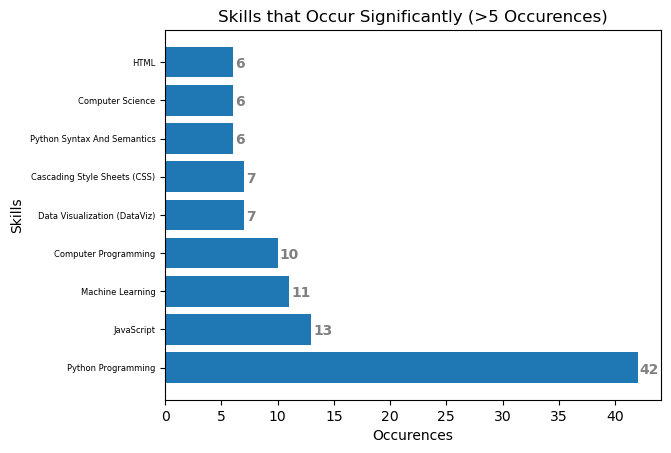

In [122]:
x = []
y = []

#Sort list
sortedList = sorted(skillsDict.items(), key=lambda x:x[1], reverse=True)
sortedSkillsDict = dict(sortedList)

# Create List of Skills that Occur Significantly (>5)
for keys, values in sortedSkillsDict.items():
    if(values > 5):
        x.append(keys)
        y.append(values)

ax = plt.barh(x, y)

# Add Annotation 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y() + 0.25,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
plt.title("Skills that Occur Significantly (>5 Occurences)")
plt.ylabel("Skills")
plt.xlabel("Occurences")

### Skills Bar Graph Using Plotly

In [121]:
sortedList = sorted(skillsDict.items(), key=lambda x:x[1], reverse=True)
sortedSkillsDict = dict(sortedList)

# skillsdf = pd.DataFrame.from_dict(sortedSkillsDict)

fig = px.bar(y=[key for key in sortedSkillsDict.keys()][0:10], x=[value for value in sortedSkillsDict.values()][0:10])

fig.show()


In [124]:
def keywordCheck(keyword, column):
    myList = []
    for i in column:
        try:
            if keyword in i:
                myList.append(True)
            else:
                myList.append(False)
        except: continue
    return myList

coursera["hasPython"] = keywordCheck("Python Programming", coursera["skills"])

coursera.head()

,link,title,ratingPercentage,ratingCount,enrolledCount,recentViews,instructorRatingCount,instructorRating,reviewCount,reviewRating,...,instructors,reviewStarPercentage,enrollInformation,learnerCareerOutcomes,fiveStarReviewPercentage,fourStarReviewPercentage,threeStarReviewPercentage,twoStarReviewPercentage,oneStarReviewPercentage,hasPython
0,https://www.coursera.org/learn/machine-learning?,Supervised Machine Learning: Regression and Cl...,98,11187,365621,2816756,4494,4.95,2507,4.9,...,"[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 91.73%], [4 stars, 7.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,91.73,7.22,0.59,0.21,0.22,False
1,https://www.coursera.org/learn/advanced-learni...,Advanced Learning Algorithms,98,2813,129874,1274781,981,4.97,487,4.9,...,"[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 93.04%], [4 stars, 6.22%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,93.04,6.22,0.41,0.13,0.17,False
2,https://www.coursera.org/learn/unsupervised-le...,"Unsupervised Learning, Recommenders, Reinforce...",97,1379,97661,620545,477,4.96,279,4.9,...,"[[Andrew Ng, TOP INSTRUCTOR, Instructor, Found...","[[5 stars, 92.21%], [4 stars, 6.78%], [3 stars...","[Financial aid available, This Course Plus the...",NaN,92.21,6.78,0.71,0.28,NaN,False
3,https://www.coursera.org/learn/ml-foundations?...,Machine Learning Foundations: A Case Study App...,93,13277,375689,85579,1161,4.68,3183,4.6,...,"[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 72.43%], [4 stars, 20.94%], [3 star...","[Financial aid available, This Course Plus the...",NaN,72.43,20.94,3.72,1.09,1.79,True
4,https://www.coursera.org/learn/ml-regression?s...,Machine Learning: Regression,94,5518,153704,32744,163,4.78,1022,4.8,...,"[[Emily Fox, 0, Amazon Professor of Machine Le...","[[5 stars, 80.92%], [4 stars, 15.92%], [3 star...","[Financial aid available, This Course Plus the...",NaN,80.92,15.92,1.88,0.45,0.81,False


In [114]:
sortedSkillsDict

{'Python Programming': 42,
 'JavaScript': 13,
 'Machine Learning': 11,
 'Computer Programming': 10,
 'Data Visualization (DataViz)': 7,
 'Cascading Style Sheets (CSS)': 7,
 'Python Syntax And Semantics': 6,
 'Computer Science': 6,
 'HTML': 6,
 'Deep Learning': 5,
 'Pandas': 5,
 'Numpy': 5,
 'Linear Algebra': 4,
 'Programming Principles': 4,
 'Data Science': 4,
 'Data Analysis': 4,
 'Data Structure': 4,
 'Object-Oriented Programming (OOP)': 4,
 'Java Programming': 4,
 'Web Development': 4,
 'Gradient Descent': 3,
 'Linear Regression': 3,
 'Tensorflow': 3,
 'Database (DBMS)': 3,
 'Debugging': 3,
 'Web Design': 3,
 'Mongodb': 3,
 'Meteor': 3,
 'Artificial Neural Network': 2,
 'K-Means Clustering': 2,
 'Mathematical Optimization': 2,
 'Convolutional Neural Network': 2,
 'Eigenvalues And Eigenvectors': 2,
 'Natural Language Processing': 2,
 'Machine Learning (ML) Algorithms': 2,
 'Scikit-Learn': 2,
 'Statistical Analysis': 2,
 'Python Tools': 2,
 'Tuple': 2,
 'SQL': 2,
 'Coding': 2,
 'Matpl

We must also find the recurring information that appears in Product Glance, Enrollment Information, Partners, and Instructors. For Product Glance, we are looking to see whether information such as "100% online" is reoccuring in the courses.

In [79]:
array = coursera['productGlance']
productGlanceDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j][0] in productGlanceDict):
            productGlanceDict[array[i][j][0]] = 1
        else:
            productGlanceDict[array[i][j][0]] += 1 

uniqueProductGlanceValue = len(productGlanceDict)
print(f'''Unique Product Glance: {uniqueProductGlanceValue}\n-----------------\n''')

for keys, value in productGlanceDict.items():
    print(f'''{keys} = {value}''')
    

Unique Product Glance: 61
-----------------

Flexible deadlines = 102
Shareable Certificate = 100
100% online = 102
Coursera Labs = 102
Course 1 of 3 in the = 5
Beginner Level = 49
Approx. 33 hours to complete = 2
English = 102
Course 2 of 3 in the = 5
Approx. 34 hours to complete = 3
Course 3 of 3 in the = 4
Approx. 27 hours to complete = 3
Course 1 of 4 in the = 9
Approx. 18 hours to complete = 6
Course 2 of 4 in the = 8
Approx. 22 hours to complete = 2
Course 3 of 4 in the = 8
Approx. 21 hours to complete = 4
Course 4 of 4 in the = 8
Approx. 17 hours to complete = 5
Course 1 of 5 in the = 7
Intermediate Level = 30
Approx. 24 hours to complete = 3
Course 2 of 5 in the = 6
Approx. 23 hours to complete = 3
Course 3 of 5 in the = 6
Approx. 6 hours to complete = 4
Course 4 of 5 in the = 5
Approx. 35 hours to complete = 1
Approx. 20 hours to complete = 6
Approx. 12 hours to complete = 4
Approx. 25 hours to complete = 6
Approx. 31 hours to complete = 4
Approx. 9 hours to complete = 7
Appro

### Bar Graph for Product Glance

Text(0.5, 0, 'Occurences')

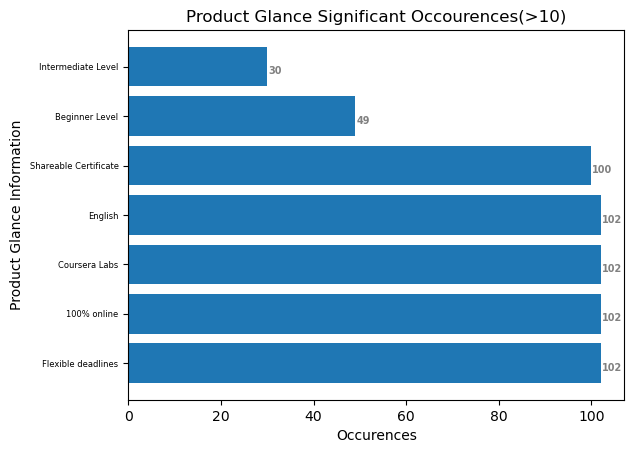

In [90]:
x = []
y = []

#Sort list
sortedList = sorted(productGlanceDict.items(), key=lambda x:x[1], reverse=True)
sortedProductGlanceDict = dict(sortedList)

# Create List of Skills that Occur Significantly (>5)
for keys, values in sortedProductGlanceDict.items():
    if(values > 10):
        x.append(keys)
        y.append(values)

ax = plt.barh(x, y)
plt.rc('ytick', labelsize=5) 

# Add Annotation 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize = 7, fontweight ='bold',
             color ='grey')
 
plt.title("Product Glance Significant Occourences(>10)")
plt.ylabel("Product Glance Information")
plt.xlabel("Occurences")

It seems that all courses are 100% online, with flexible deadlines and shareable certificates

For Enroll  Information, we are looking for data such as "Financial Aid Available"

In [81]:
array = coursera['enrollInformation']
enrollInformationDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j] in enrollInformationDict):
            enrollInformationDict[array[i][j]] = 1
        else:
            enrollInformationDict[array[i][j]] += 1 

uniqueEnrollInformationValue = len(enrollInformationDict)
print(f'''Unique Enroll Information: {uniqueEnrollInformationValue}\n-----------------\n''')

for keys, value in enrollInformationDict.items():
    print(f'''{keys} = {value}''')
    

Unique Enroll Information: 33
-----------------

Financial aid available = 98
This Course Plus the Full Specialization = 80
Shareable Certificates = 80
Self-Paced Learning Option = 80
Course Videos & Readings = 80
Practice Quizzes = 80
Graded Assignments with Peer Feedback = 80
Graded Quizzes with Feedback = 80
Graded Programming Assignments = 80
Enroll for Free
Starts Jul 12 = 11
150,611 already enrolled = 1
182,118 already enrolled = 1
Taught by top companies and universities = 9
Affordable programs = 9
Apply your skills with hands-on projects = 9
Learn on your own schedule = 9
Course videos and readings = 9
Graded quizzes and assignments = 9
No degree or experience required for many programs = 9
Shareable Certificate upon completion = 9
53,152 already enrolled = 1
392,122 already enrolled = 1
190,956 already enrolled = 1
95,087 already enrolled = 1
2,921 already enrolled = 1
 = 2
287,831 already enrolled = 2
5,895 already enrolled = 1
1,914 already enrolled = 1
Financial aid availab

### Bar Graph for Enroll Information

Text(0.5, 0, 'Occurences')

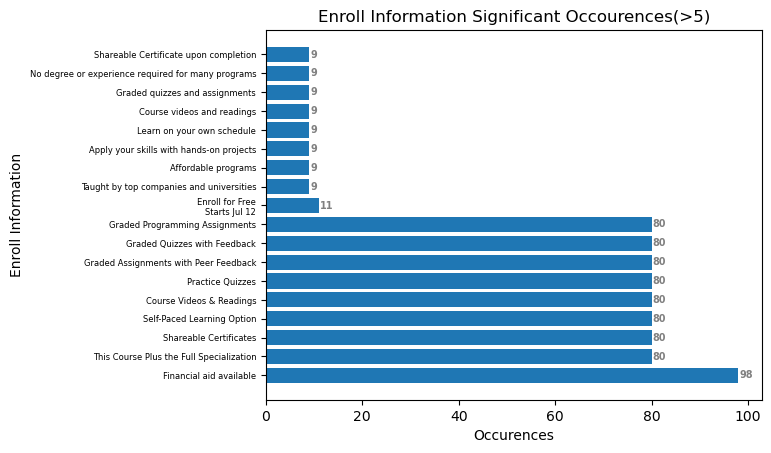

In [92]:
x = []
y = []

#Sort list
sortedList = sorted(enrollInformationDict.items(), key=lambda x:x[1], reverse=True)
sortedEnrollInformationDict = dict(sortedList)

# Create List of Skills that Occur Significantly (>5)
for keys, values in sortedEnrollInformationDict.items():
    if(values > 5):
        x.append(keys)
        y.append(values)

ax = plt.barh(x, y)

# Add Annotation 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize = 7, fontweight ='bold',
             color ='grey')
 
plt.title("Enroll Information Significant Occourences(>5)")
plt.ylabel("Enroll Information")
plt.xlabel("Occurences")

In [83]:
array = coursera['partners']
partnersDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j][0] in partnersDict):
            partnersDict[array[i][j][0]] = 1
        else:
            partnersDict[array[i][j][0]] += 1 

uniquePartnerValue = len(partnersDict)
print(f'''Unique Partners: {uniquePartnerValue}\n-----------------\n''')

for keys, value in partnersDict.items():
    print(f'''{keys} = {value}''')
    

Unique Partners: 28
-----------------

DeepLearning.AI = 9
Stanford University = 3
University of Washington = 4
University of London = 8
Imperial College London = 3
Duke University = 6
IBM = 5
University of Michigan = 20
Alberta Machine Intelligence Institute = 4
Goldsmiths, University of London = 7
University of Pennsylvania = 5
Google = 3
Meta = 2
University of Toronto = 1
The Hong Kong University of Science and Technology = 1
Nanjing University = 1
Johns Hopkins University = 2
Infosec = 3
University of Colorado Boulder = 3
Codio = 4
Princeton University = 2
Rice University = 4
LearnQuest = 4
Korea Advanced Institute of Science and Technology(KAIST) = 1
University of California, Davis = 4
Scrimba = 1
DeepLearning.AI
 = 1
Amazon Web Services
 = 1


### Bar Graph For Partners

Text(0.5, 0, 'Occurences')

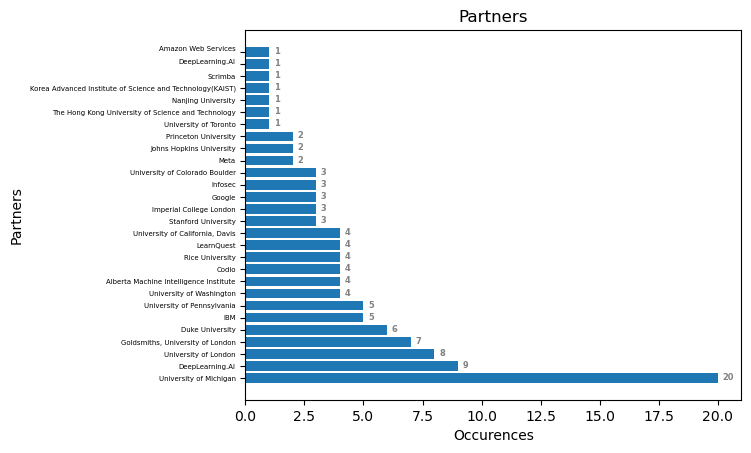

In [91]:
x = []
y = []

#Sort list
sortedList = sorted(partnersDict.items(), key=lambda x:x[1], reverse=True)
sortedPartnersDict = dict(sortedList)

# Create List of Skills that Occur Significantly (>5)
for keys, values in sortedPartnersDict.items():
    # if(values > 5):
        x.append(keys)
        y.append(values)

ax = plt.barh(x, y)
plt.rc('ytick', labelsize=6) 

# Add Annotation 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize = 6, fontweight ='bold',
             color ='grey')
 
plt.title("Partners")
plt.ylabel("Partners")
plt.xlabel("Occurences")

In [85]:
array = coursera['instructors']
instructorsDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if not (array[i][j][0] in instructorsDict):
            instructorsDict[array[i][j][0]] = 1
        else:
            instructorsDict[array[i][j][0]] += 1 

uniqueInstructorsValue = len(instructorsDict)
print(f'''Unique Instructors: {uniqueInstructorsValue}\n-----------------\n''')

for keys, value in instructorsDict.items():
    print(f'''{keys} = {value}''')

Unique Instructors: 81
-----------------

Andrew Ng = 8
Eddy Shyu = 3
Aarti Bagul = 3
Geoff Ladwig = 3
Emily Fox = 4
Carlos Guestrin = 4
Prof Marco Gillies = 3
Kian Katanforoosh = 4
Younes Bensouda Mourri = 4
David Dye = 2
Samuel J. Cooper = 2
A. Freddie Page = 2
Marc Peter Deisenroth = 1
Lawrence Carin  = 1
David Carlson = 1
Timothy Dunn = 1
Kevin Liang = 1
SAEED AGHABOZORGI = 1
Joseph Santarcangelo = 5
Luis Serrano = 2
Elena Sanina = 2
Anshuman Singh = 2
Magdalena Bouza = 2
Kevyn Collins-Thompson = 2
Anna Koop = 4
Dr Matthew Yee-King = 7
Dr Betty Fyn-Sydney = 1
Dr Jamie A Ward = 1
Dr Larisa Soldatova = 1
Brandon Krakowsky = 5
Charles Russell Severance = 8
Google Career Certificates = 3
Paul Resnick = 4
Steve Oney = 3
Taught by Meta Staff = 2
Christopher Brooks = 2
V. G. Vinod Vydiswaran = 1
Jennifer Campbell = 1
Paul Gries = 1
Xuhu Wan = 1
ZHANG Li = 1
Joseph W. Cutrone, PhD = 1
Associate Teaching Professor and Director of Online Programs = 1
Mathematics = 1
 143,642 Learners = 1
How

### Bar Graph For Instructors

TypeError: 'value' must be an instance of str or bytes, not a None

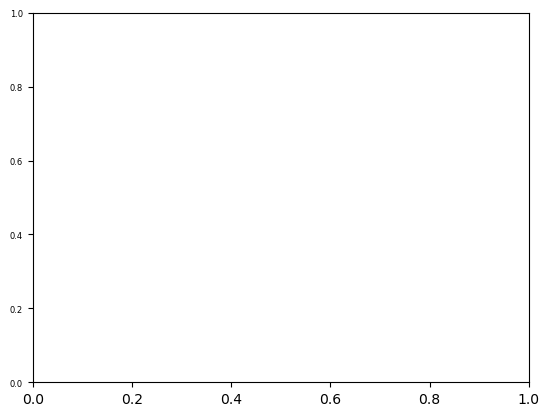

In [86]:
x = []
y = []
# Create List of Skills that Occur Significantly (>5)
for keys, values in instructorsDict.items():
    # if(values > 5):
    if values != None:
        x.append(keys)
        y.append(values)

ax = plt.barh(x, y)
plt.rc('ytick', labelsize=6) 

# Add Annotation 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize = 6, fontweight ='bold',
             color ='grey')
 
plt.title("Instructor Occurences")
plt.ylabel("Instructors")
plt.xlabel("Occurences")

# Keyword Checker

Checks if a keyword is contained in one of the columns

In [87]:
def keywordCheck(keyword, column):
    myList = []
    for i in column:
        try:
            if keyword in i:
                myList.append(True)
            else:
                myList.append(False)
        except: continue
    return myList

Testing

In [88]:
array = keywordCheck('Machine Learning', coursera['title'])

for i in array:
    print(i)

True
False
False
True
True
True
True
True
False
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


Violin Plots

In [129]:
fig = px.violin(coursera, x="hasPython", y="enrolledCount",box=True)

fig.show()
